In [1]:
import os
import pandas as pd
import numpy as np
from parsers import austria
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
import scipy

first_day_with_states = datetime.strptime("09.03.2020", "%d.%m.%Y")

data_dir = os.path.join(os.getcwd(), "data")
table_png = os.path.join(os.getcwd(), "images", "states-cases-table.png")

def export_fig(fig, name):
    png_path = os.path.join(os.getcwd(), "images", "{}.svg".format(name))
    svg_path = os.path.join(os.getcwd(), "images", "{}.png".format(name))
    fig.savefig(svg_path,bbox_inches="tight")
    fig.savefig(png_path,bbox_inches="tight")

def insert(what, towhere, tag_start, tag_end):
    """Insert table into README.md"""
    # backup original
    cmd = f"cp -vf {towhere} tmp-backup.txt"
    os.system(cmd)
    with open(towhere, "r") as in_file:
        buf = in_file.readlines()
    with open(what, "rt") as f_table:
        contents = f_table.read()
    with open(towhere, "w") as out_file:
        started = False
        for line in buf:
            if tag_start in line:
                started = True
                line = line + "<pre>\n" + contents +"\n</pre>\n"
                out_file.write(line)
            if tag_end in line:
                started = False
            if not started:
                out_file.write(line)
    os.system("rm -f tmp-backup.txt")

cases, recovered = austria.data(data_dir)


cases["datetime"] = pd.to_datetime(cases['date'] + ' ' + cases['time'], format="%d.%m.%Y %H:%M")
cases.set_index("datetime", inplace=True)
df = cases.sort_index()
df.drop_duplicates(subset=["date", "time"], keep="last", inplace=True)
df['total_deaths'] = df['total_deaths'].fillna(0).astype(int)

recovered["datetime"] = pd.to_datetime(recovered['date'] + ' ' + recovered['time'], format="%d.%m.%Y %H:%M")
recovered.set_index("datetime", inplace=True)
df_recovered = recovered.sort_index()
df_recovered.drop_duplicates(subset=["date", "time"], keep="last", inplace=True)
df_recovered


cases

,date,time,total_cases,total_tests,Burgenland,Kärnten,Niederösterreich,Oberösterreich,Salzburg,Steiermark,Tirol,Vorarlberg,Wien,total_deaths
datetime,,,,,,,,,,,,,,
2020-03-04 09:00:00,04.03.2020,09:00,27,3138,0,0,0,0,0,0,0,0,0,NaN
2020-03-06 08:00:00,06.03.2020,08:00,47,4000,0,0,0,0,0,0,0,0,0,NaN
2020-03-07 08:00:00,07.03.2020,08:00,74,4308,0,0,0,0,0,0,0,0,0,NaN
2020-03-07 15:00:00,07.03.2020,15:00,79,4308,0,0,0,0,0,0,0,0,0,NaN
2020-03-08 08:00:00,08.03.2020,08:00,99,4509,0,0,0,0,0,0,0,0,0,NaN
2020-03-09 08:00:00,09.03.2020,08:00,112,4734,0,0,0,0,0,0,0,0,0,NaN
2020-03-09 15:00:00,09.03.2020,15:00,131,4734,4,1,36,11,9,16,16,3,35,NaN
2020-03-10 15:00:00,10.03.2020,15:00,182,5026,4,1,40,22,12,17,32,11,43,NaN
2020-03-11 15:00:00,11.03.2020,15:00,246,5362,4,3,45,35,14,25,57,13,50,NaN


In [2]:
state_cases = df.copy()
#state_cases.drop(columns=["date", "time", "total_cases", "total_tests", "total_deaths"], inplace=True)
state_cases.drop(columns=state_cases.columns.difference(austria.states), inplace=True)
state_cases.index = state_cases.index.normalize()
state_cases.index.names = ["date"]
state_cases = state_cases.loc[first_day_with_states:]
state_cases = state_cases.loc[~state_cases.index.duplicated(keep='last')]
state_cases

,Burgenland,Kärnten,Niederösterreich,Oberösterreich,Salzburg,Steiermark,Tirol,Vorarlberg,Wien
date,,,,,,,,,
2020-03-09,4,1,36,11,9,16,16,3,35
2020-03-10,4,1,40,22,12,17,32,11,43
2020-03-11,4,3,45,35,14,25,57,13,50
2020-03-12,6,3,51,58,19,33,109,16,66
2020-03-13,7,4,63,84,23,52,167,22,82
2020-03-14,9,4,82,101,28,61,206,26,85


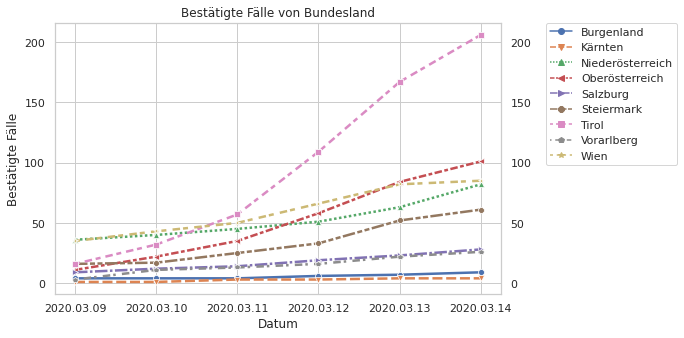

In [3]:
import matplotlib.dates as mdates
dash_styles = ["",
               (4, 1.5),
               (1, 1),
               (3, 1, 1.5, 1),
               (5, 1, 1, 1),
               (5, 1, 2, 1, 2, 1),
               (2, 2, 3, 1.5),
               (1, 2.5, 3, 1.2),
              ( 2, 2.5, 3, 1.2)]
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

sns.set(rc={'figure.figsize':(8,5)}, style="whitegrid")
plot, ax = plt.subplots()
plot = sns.lineplot(data=state_cases, linewidth=2.5, dashes=dash_styles, markers=filled_markers, ax=ax)
plot.tick_params(labelright=True)
plot.set(xlabel='Datum', ylabel='Bestätigte Fälle', title="Bestätigte Fälle von Bundesland")
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))

In [4]:
export_fig(plot.get_figure(), "states-cases")

In [5]:
import imgkit
css = """
<!DOCTYPE HTML>
<html>

<head>
<meta charset="utf-8">
<style type=\"text/css\">
table {
color: #333;
font-family: Helvetica, Arial, sans-serif;
width: 100%;
border-collapse:
collapse; 
border-spacing: 0;
font-size: 16px;
}
td, th {
border: 1px solid transparent;
height: 30px;
}
th {
background: #DFDFDF;
font-weight: bold;
}
td {
background: #FAFAFA;
text-align: center;
}
table tr:nth-child(odd) td{
background-color: white;
}
</style>
</head><body>
"""
text_file = open("table.html", "w")
text_file.write(css)
text_file.write(state_cases.to_html())
text_file.close()
imgkitoptions = {"format": "png", 'encoding': "UTF-8"}
imgkit.from_file("table.html", table_png, options=imgkitoptions)

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

In [6]:
total_cases = df.copy()
total_cases.drop(columns=total_cases.columns.difference(["total_cases"]), inplace=True)
total_cases.index = total_cases.index.normalize()
total_cases = total_cases.loc[~total_cases.index.duplicated(keep='last')]
total_cases.total_cases = total_cases.total_cases.astype(int)
total_cases

,total_cases
datetime,
2020-03-04,27
2020-03-06,47
2020-03-07,79
2020-03-08,99
2020-03-09,131
2020-03-10,182
2020-03-11,246
2020-03-12,361
2020-03-13,504


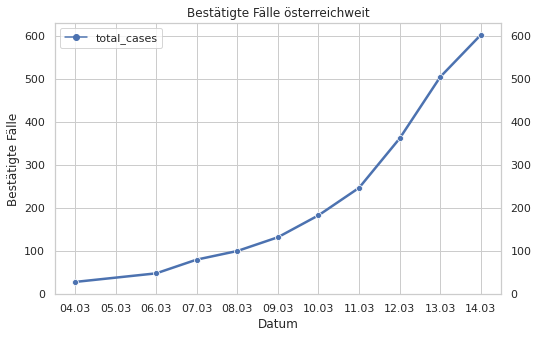

In [7]:
plot, ax = plt.subplots()
plot = sns.lineplot(data=total_cases, linewidth=2.5,  markers=filled_markers, ax=ax)
plot.tick_params(labelright=True)
plot.set(xlabel='Datum', ylabel='Bestätigte Fälle', title="Bestätigte Fälle österreichweit")
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))

In [34]:
total_tests = df.copy()
total_tests.drop(columns=total_tests.columns.difference(["total_tests"]), inplace=True)
total_tests.index = total_tests.index.normalize()
total_tests = total_tests.loc[~total_tests.index.duplicated(keep='last')]
total_tests

,total_tests
datetime,
2020-03-04,3138
2020-03-06,4000
2020-03-07,4308
2020-03-08,4509
2020-03-09,4734
2020-03-10,5026
2020-03-11,5362
2020-03-12,5869
2020-03-13,6582


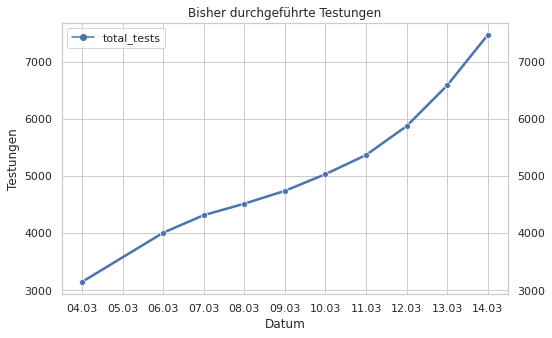

In [37]:
plot, ax = plt.subplots()
plot = sns.lineplot(data=total_tests, linewidth=2.5,  markers=filled_markers, ax=ax)
plot.tick_params(labelright=True)
plot.set(xlabel='Datum', ylabel='Testungen', title="Bisher durchgeführte Testungen")
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
export_fig(plot.get_figure(), "country-tests")

In [8]:
country = df.copy()
country.drop(columns=country.columns.difference(["total_cases", "total_deaths"]), inplace=True)
country.total_cases = country.total_cases.astype(int)
country.index = country.index.normalize()
country = country.loc[~country.index.duplicated(keep='last')]
country

,total_cases,total_deaths
datetime,,
2020-03-04,27,0
2020-03-06,47,0
2020-03-07,79,0
2020-03-08,99,0
2020-03-09,131,0
2020-03-10,182,0
2020-03-11,246,0
2020-03-12,361,1
2020-03-13,504,1


In [9]:
df_recovered.drop(columns=df_recovered.columns.difference(["total_recovered"]), inplace=True)
#df_recovered.total_cases = df_recovered.total_recovered.astype(int)
df_recovered.index = df_recovered.index.normalize()
df_recovered = df_recovered.loc[~df_recovered.index.duplicated(keep='last')]
df_recovered

,total_recovered
datetime,
2020-03-09,2
2020-03-10,4
2020-03-11,4
2020-03-12,4
2020-03-13,6
2020-03-14,6


In [10]:
country.rename(columns={'total_cases': 'confirmed', 'total_deaths': 'deaths'}, inplace=True)
country['recovered'] = df_recovered.total_recovered
country['recovered'] = country['recovered'].fillna(0).astype(int)
country['active'] = country.confirmed - country.recovered - country.deaths
country

,confirmed,deaths,recovered,active
datetime,,,,
2020-03-04,27,0,0,27
2020-03-06,47,0,0,47
2020-03-07,79,0,0,79
2020-03-08,99,0,0,99
2020-03-09,131,0,2,129
2020-03-10,182,0,4,178
2020-03-11,246,0,4,242
2020-03-12,361,1,4,356
2020-03-13,504,1,6,497


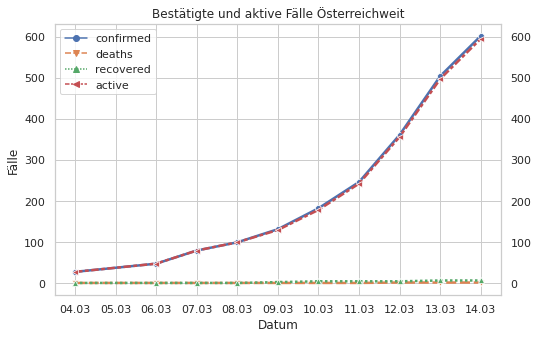

In [11]:
plot, ax = plt.subplots()
plot = sns.lineplot(data=country, linewidth=2.5,  markers=filled_markers, ax=ax)
plot.tick_params(labelright=True)
plot.set(xlabel='Datum', ylabel='Fälle', title="Bestätigte und aktive Fälle Österreichweit")
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d.%m'))
#ax.axhline(600, ls='--')#64805


In [12]:
export_fig(plot.get_figure(), "country-cases")

In [13]:
country['days-td'] = country.index - country.index.min()  # days as TimeDelta type
country['days'] = country['days-td'].astype("timedelta64[D]").astype(float)
country

,confirmed,deaths,recovered,active,days-td,days
datetime,,,,,,
2020-03-04,27,0,0,27,0 days,0.0
2020-03-06,47,0,0,47,2 days,2.0
2020-03-07,79,0,0,79,3 days,3.0
2020-03-08,99,0,0,99,4 days,4.0
2020-03-09,131,0,2,129,5 days,5.0
2020-03-10,182,0,4,178,6 days,6.0
2020-03-11,246,0,4,242,7 days,7.0
2020-03-12,361,1,4,356,8 days,8.0
2020-03-13,504,1,6,497,9 days,9.0


In [14]:
def model_par(t0=None, p=None, c=None, a0=None):
    """Just to order parameters into tuple for curve_fit call"""
    return t0, p, c, a0

def model(t, t0, p, c, a0):
    """Simple model"""
    
    return c*(t-t0)**p + a0 

def pretty_params(param, end="\n"):
    t0, p, c, a0 = param
    s = "p = {:.3f}".format(p) + end
    s += "c = {:.3g}".format(c) + end
    s += "t0= {:.3f}".format(t0) + end
    s += "a0= {:.3f}".format(a0)
    return s

def day_to_date(day, day0=pd.datetime(year=2020, month=1, day=21)):
    """Given the day from day0 (21 Jan 2020), return the data as a string.
    Example output: '26 Jan 2020'
    
    Needed to obtain days for forecasts into the future, which are not given in our data frame 'data' yet.
    """
    assert isinstance(day, (int, float)), day
    
    # Compute date
    date = day0 + pd.Timedelta(day, "D")
    # format nicely
    s = date.strftime("%d %b %Y")
    return s

/var/home/ramblurr/src/covidat/venv/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [15]:
p0 = model_par(t0=0, p=1, c=1, a0=0)   # guess initial values for fit parameters
days = country['days']
infections = country['confirmed']
param_infections, cov_infections = \
    scipy.optimize.curve_fit(model, days, 
                             infections,
                             p0=p0 
                             )

In [16]:
country

,confirmed,deaths,recovered,active,days-td,days
datetime,,,,,,
2020-03-04,27,0,0,27,0 days,0.0
2020-03-06,47,0,0,47,2 days,2.0
2020-03-07,79,0,0,79,3 days,3.0
2020-03-08,99,0,0,99,4 days,4.0
2020-03-09,131,0,2,129,5 days,5.0
2020-03-10,182,0,4,178,6 days,6.0
2020-03-11,246,0,4,242,7 days,7.0
2020-03-12,361,1,4,356,8 days,8.0
2020-03-13,504,1,6,497,9 days,9.0


In [17]:
t0, p, c, a0 = param_infections
fitted_infections = model(days, t0, p, c, a0)
print(pretty_params(param_infections))

p = 2.093
c = 4.64
t0= -0.000
a0= 12.328


In [18]:
# Estimated standard deviation of parameters
print("Uncertainties for fit parameters:")
with np.printoptions(precision=2, suppress=True):
    print(pretty_params(np.sqrt(cov_infections.diagonal())))

Uncertainties for fit parameters:
p = 0.251
c = 2.73
t0= 0.715
a0= 24.122


In [19]:
country

,confirmed,deaths,recovered,active,days-td,days
datetime,,,,,,
2020-03-04,27,0,0,27,0 days,0.0
2020-03-06,47,0,0,47,2 days,2.0
2020-03-07,79,0,0,79,3 days,3.0
2020-03-08,99,0,0,99,4 days,4.0
2020-03-09,131,0,2,129,5 days,5.0
2020-03-10,182,0,4,178,6 days,6.0
2020-03-11,246,0,4,242,7 days,7.0
2020-03-12,361,1,4,356,8 days,8.0
2020-03-13,504,1,6,497,9 days,9.0


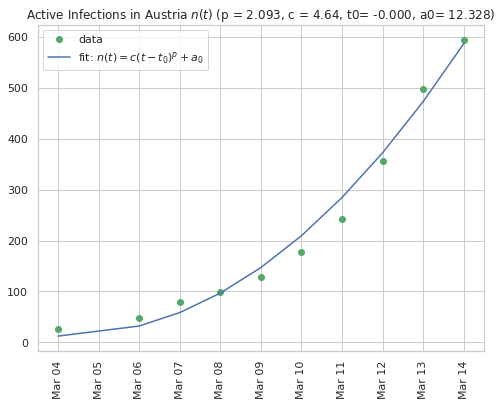

In [20]:
figsize = (8, 6) 
country['date'] = country.index
fig, ax = plt.subplots(figsize=figsize)
ax.plot(country['date'], country['active'], 'og')
ax.plot(country['date'], fitted_infections, '-b')
ax.legend(["data", "fit: $n(t) = c(t-t_0)^p+a_0$"])
ax.set_title(f"Active Infections in Austria $n(t)$ ({pretty_params(param_infections, end=', ')})")
ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
ax.tick_params(axis='x', rotation=90)
export_fig(fig, "infections-with-model-fit")

In [21]:
forecasts = pd.DataFrame(columns=['forecast', 'days-ahead', 'forecast-date'])
forecasts.loc['31 Jan 2020'] = [100, 10, '31 Jan 2020']
forecasts.index
max(country.index)

Timestamp('2020-03-14 00:00:00')

In [22]:
# write model parameters to file
parameter_file = "data/austria-model-parameters.txt"
t0, p, c, a0 = param_infections
fitted_infections = model(days, t0, p, c, a0)
# check if we have entry for this date
date = max(country.index).date().isoformat()
# have we written data based on 'date' to the file already?
if os.path.exists(parameter_file) and date in open(parameter_file, "r").read():
    print(f"Already entry for {date} in {parameter_file}")
else:
    with open(parameter_file, "ta") as f:
        s = f"{date}: {pretty_params(param_infections, end=', ')}"
        print(s)
        f.write(s)

2020-03-14: p = 2.093, c = 4.64, t0= -0.000, a0= 12.328


In [23]:
!cat data/austria-model-parameters.txt

2020-03-13: p = 2.876, c = 0.408, t0= -2.031, a0= 26.0382020-03-14: p = 2.093, c = 4.64, t0= -0.000, a0= 12.328

In [24]:
forecast_data = [] 
for future_days in range(1, 30):
        d = int(max(country['days'])) + future_days
        forecast_data.append({'days': d, 'infections': int(round(model(d, c=c, t0=t0, p=p, a0=a0))),
                           'date': day_to_date(d, min(country.index))})
forecast_data

[{'days': 11, 'infections': 714, 'date': '15 Mar 2020'},
 {'days': 12, 'infections': 854, 'date': '16 Mar 2020'},
 {'days': 13, 'infections': 1008, 'date': '17 Mar 2020'},
 {'days': 14, 'infections': 1175, 'date': '18 Mar 2020'},
 {'days': 15, 'infections': 1355, 'date': '19 Mar 2020'},
 {'days': 16, 'infections': 1550, 'date': '20 Mar 2020'},
 {'days': 17, 'infections': 1758, 'date': '21 Mar 2020'},
 {'days': 18, 'infections': 1980, 'date': '22 Mar 2020'},
 {'days': 19, 'infections': 2215, 'date': '23 Mar 2020'},
 {'days': 20, 'infections': 2465, 'date': '24 Mar 2020'},
 {'days': 21, 'infections': 2729, 'date': '25 Mar 2020'},
 {'days': 22, 'infections': 3006, 'date': '26 Mar 2020'},
 {'days': 23, 'infections': 3298, 'date': '27 Mar 2020'},
 {'days': 24, 'infections': 3605, 'date': '28 Mar 2020'},
 {'days': 25, 'infections': 3925, 'date': '29 Mar 2020'},
 {'days': 26, 'infections': 4260, 'date': '30 Mar 2020'},
 {'days': 27, 'infections': 4609, 'date': '31 Mar 2020'},
 {'days': 28, 'i

In [25]:

with open("data/austria-forecast-infections.txt", "tw") as f:
    f.write(f"Forecast for cases in Austria:\n\n")
    f.write(f"Last data point used in forecast from {max(country.index)}\n\n")
    for future in forecast_data:
        f.write("Infections in {days:2} days: {infections:6} ({date})\n".format(**future))
        
        
        
    f.write(f"\nFit parameters: {pretty_params(param_infections, end=' ')}")
!cat data/austria-forecast-infections.txt

Forecast for cases in Austria:

Last data point used in forecast from 2020-03-14 00:00:00

Infections in 11 days:    714 (15 Mar 2020)
Infections in 12 days:    854 (16 Mar 2020)
Infections in 13 days:   1008 (17 Mar 2020)
Infections in 14 days:   1175 (18 Mar 2020)
Infections in 15 days:   1355 (19 Mar 2020)
Infections in 16 days:   1550 (20 Mar 2020)
Infections in 17 days:   1758 (21 Mar 2020)
Infections in 18 days:   1980 (22 Mar 2020)
Infections in 19 days:   2215 (23 Mar 2020)
Infections in 20 days:   2465 (24 Mar 2020)
Infections in 21 days:   2729 (25 Mar 2020)
Infections in 22 days:   3006 (26 Mar 2020)
Infections in 23 days:   3298 (27 Mar 2020)
Infections in 24 days:   3605 (28 Mar 2020)
Infections in 25 days:   3925 (29 Mar 2020)
Infections in 26 days:   4260 (30 Mar 2020)
Infections in 27 days:   4609 (31 Mar 2020)
Infections in 28 days:   4973 (01 Apr 2020)
Infections in 29 days:   5351 (02 Apr 2020)
Infections in 30 days:   5743 (03 Apr 2020)
Infections in 31 days:   6150

In [26]:
insert("data/austria-forecast-infections.txt", "README.md", tag_start="[table1]: start", tag_end="[table1]: end")

In [27]:
pd_df = pd.DataFrame(forecast_data)
pd_df["date"] = pd.to_datetime(pd_df['date'], format="%d %b %Y")
pd_df.set_index("date", inplace=True)
pd_df["date"]  = pd_df.index
pd_df

,days,infections,date
date,,,
2020-03-15,11,714,2020-03-15
2020-03-16,12,854,2020-03-16
2020-03-17,13,1008,2020-03-17
2020-03-18,14,1175,2020-03-18
2020-03-19,15,1355,2020-03-19
2020-03-20,16,1550,2020-03-20
2020-03-21,17,1758,2020-03-21
2020-03-22,18,1980,2020-03-22
2020-03-23,19,2215,2020-03-23


In [28]:
country

,confirmed,deaths,recovered,active,days-td,days,date
datetime,,,,,,,
2020-03-04,27,0,0,27,0 days,0.0,2020-03-04
2020-03-06,47,0,0,47,2 days,2.0,2020-03-06
2020-03-07,79,0,0,79,3 days,3.0,2020-03-07
2020-03-08,99,0,0,99,4 days,4.0,2020-03-08
2020-03-09,131,0,2,129,5 days,5.0,2020-03-09
2020-03-10,182,0,4,178,6 days,6.0,2020-03-10
2020-03-11,246,0,4,242,7 days,7.0,2020-03-11
2020-03-12,361,1,4,356,8 days,8.0,2020-03-12
2020-03-13,504,1,6,497,9 days,9.0,2020-03-13


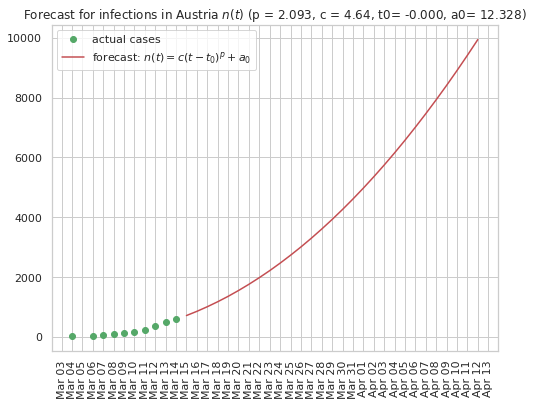

In [29]:
figsize = (8, 6) 
country['date'] = country.index
fig, ax = plt.subplots(figsize=figsize)
ax.plot(country['date'], country['active'], 'og')
ax.plot(pd_df["date"], pd_df["infections"], '-r')
#ax.plot(country['date'], fitted_infections, '-b')
ax.legend(["actual cases", "forecast: $n(t) = c(t-t_0)^p+a_0$"])
ax.set_title(f"Forecast for infections in Austria $n(t)$ ({pretty_params(param_infections, end=', ')})")
ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
ax.tick_params(axis='x', rotation=90)

export_fig(fig, "infections-with-forecast")

## How long does it take for the number of infections to double?

- ORF reported on 2020-03-12 that doubling was at 2.5 days
- however the the recent [Lancet paper](https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(20)30260-9/fulltext) reports 6.4 days after studiying data from China for Dec 31, 2019, to Jan 28, 2020,

- based on $n(t') =  2n(t)$, we find $$t' = \left((2(t-t_0)^p+\frac{a_0}{c}\right)^\frac{1}{p} + t_0$$

- the time for infections or deaths to double is thus given by $t' - t$, and we can implement the above equation:

In [30]:
def time_to_double(t, c, t0, p, a0):
    tprime = (2*(t - t0)**p + a0/c)**(1/p) + t0
    return tprime - t

In [31]:
doubling_data = []
day = max(country['days'])
for d in range(0, 30, 2):
    doubling_data.append({
        "day": d,
        "date": day_to_date(d, min(country.index)),
        "double_days": time_to_double(d, c, t0, p, a0)
        
    })

with open("data/austria-forecast-doublings.txt", "tw") as f:
    f.write(f"Forecast for infections doubling in austria:\n\n")
    for future in doubling_data:
        f.write(
            "at day {day:2} ({date}), the time to double n is {double_days:4.1f} days\n".format(**future))

insert("data/austria-forecast-doublings.txt", "README.md", tag_start="[table2]: start", tag_end="[table2]: end")
!cat data/austria-forecast-doublings.txt

Forecast for infections doubling in austria:

at day  0 (04 Mar 2020), the time to double n is  1.6 days
at day  2 (06 Mar 2020), the time to double n is  1.2 days
at day  4 (08 Mar 2020), the time to double n is  1.8 days
at day  6 (10 Mar 2020), the time to double n is  2.5 days
at day  8 (12 Mar 2020), the time to double n is  3.2 days
at day 10 (14 Mar 2020), the time to double n is  4.0 days
at day 12 (16 Mar 2020), the time to double n is  4.8 days
at day 14 (18 Mar 2020), the time to double n is  5.5 days
at day 16 (20 Mar 2020), the time to double n is  6.3 days
at day 18 (22 Mar 2020), the time to double n is  7.1 days
at day 20 (24 Mar 2020), the time to double n is  7.9 days
at day 22 (26 Mar 2020), the time to double n is  8.7 days
at day 24 (28 Mar 2020), the time to double n is  9.4 days
at day 26 (30 Mar 2020), the time to double n is 10.2 days
at day 28 (01 Apr 2020), the time to double n is 11.0 days


**Notably** these findings reproduce the ORFs reporting that in Austria around 2020-03-12 doubling was happening every 2.5 days.